# Text Mining

# Amazon website

In [11]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
# creating empty reviews list 
phone_reviews=[]

for i in range(1,20):
  p=[]  
  #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  url = "https://www.amazon.in/Samsung-Galaxy-Midnight-Blue-Storage/dp/B07HGJJ559/ref=sxin_6?asc_contentid=amzn1.osa.af8ff710-2ff4-4d6b-9b57-c99114609009.A21TJRUUN4KGV.en_IN&asc_contenttype=article&ascsubtag=amzn1.osa.af8ff710-2ff4-4d6b-9b57-c99114609009.A21TJRUUN4KGV.en_IN&creativeASIN=B07HGJJ559&crid=3I2D6CM3W9DL&cv_ct_cx=phones+under+15000&cv_ct_id=amzn1.osa.af8ff710-2ff4-4d6b-9b57-c99114609009.A21TJRUUN4KGV.en_IN&cv_ct_pg=search&cv_ct_we=asin&cv_ct_wn=osp-single-source-pecos-desktop&dchild=1&keywords=phones+under+15000&linkCode=oas&pd_rd_i=B07HGJJ559&pd_rd_r=f9ab2a4a-9f4d-4e16-8113-584fa9212c38&pd_rd_w=qvgTo&pd_rd_wg=8hyZJ&pf_rd_p=6567d3a4-28dd-430b-a035-b0af9623dfa4&pf_rd_r=JW7F7MVPMYNAZ0WT4PDJ&qid=1621868914&sprefix=pho%2Caps%2C379&sr=1-1-c84eb971-91f2-4a4d-acce-811265c24254&tag=timessyndicat-21?showViewpoints=1&pageNumber="
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    p.append(reviews[i].text)  
  phone_reviews=phone_reviews+p  # adding the reviews of one page to empty list which in future contains all the reviews


In [13]:
# writng reviews in a text file 
with open("phone.txt","w",encoding='utf8') as output:
    output.write(str(phone_reviews))
    

In [14]:
# Joinining all the reviews into single paragraph 
p_rev_string = " ".join(phone_reviews)


In [17]:
# Removing unwanted symbols incase if exists
p_rev_string = re.sub("[^A-Za-z" "]+"," ",p_rev_string).lower()
p_rev_string = re.sub("[0-9" "]+"," ",p_rev_string)

In [18]:
import nltk
from nltk.corpus import stopwords

# words that contained in iphone 7 reviews
p_reviews_words = p_rev_string.split(" ")

stop_words = stopwords.words('english')
with open("C:/Users/Admin/Documents/data science assignment/Text mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")


In [19]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

p_reviews_words = [w for w in p_reviews_words if not w in stopwords]

In [20]:
# Joinining all the reviews into single paragraph 
p_rev_string = " ".join(p_reviews_words)

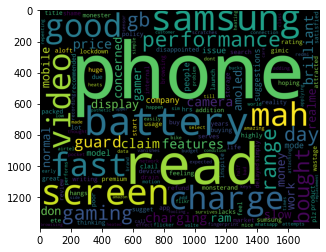

In [21]:
wordcloud_p = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(p_rev_string)

plt.imshow(wordcloud_p)


In [22]:
# positive words # Choose the path for +ve words stored in system
with open("C:/Users/Admin/Documents/data science assignment/Text mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]

In [23]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/Admin/Documents/data science assignment/Text mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]

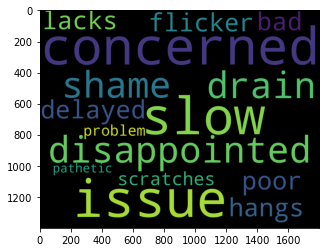

In [24]:
p_neg_in_neg = " ".join ([w for w in p_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(p_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

<module 'nltk' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\nltk\\__init__.py'>

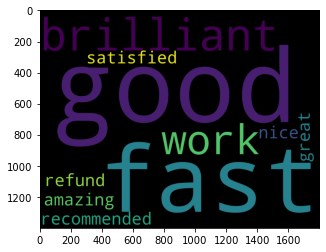

In [25]:
# Positive word cloud
# Choosing the only words which are present in positive words
p_pos_in_pos = " ".join ([w for w in p_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(p_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)

nltk 